In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import directed_hausdorff, euclidean, cosine, pdist
from IPython.display import clear_output

import scipy

from scipy import stats

from sklearn.neighbors import NearestNeighbors

In [22]:
a = np.random.rand(10,2)
b = a+5
c = a+10

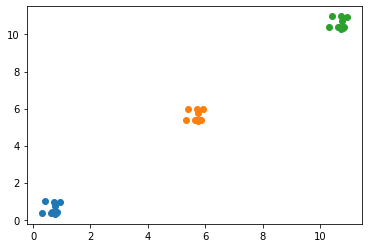

In [23]:
from matplotlib import pyplot as plt, lines
import seaborn as sns


plt.scatter(a[:,0], a[:,1])
plt.scatter(b[:,0], b[:,1])
plt.scatter(c[:,0], c[:,1])
plt.show()

In [35]:
data = pd.DataFrame(np.vstack([a,b,c]))
labels = np.hstack([['a']*a.shape[0],['b']*b.shape[0],['c']*c.shape[0]])
data['part_id'] = labels

In [50]:
data

,0,1,part_id
0,0.719228,0.971232,a
1,0.665578,0.394134,a
2,0.755822,0.737712,a
3,0.746374,0.310558,a
4,0.926977,0.962195,a
5,0.844767,0.394304,a
6,0.403803,0.984046,a
7,0.640204,0.381426,a
8,0.796336,0.361362,a
9,0.315094,0.381806,a


In [71]:
def hausdorff_distances(emb_2d):
    # directed or assymetric variant     
    labels = emb_2d.part_id.unique()
    len_labels = len(labels)
    
    # build empty df
    pairwise_distances_hausdorff = pd.DataFrame(np.zeros((len_labels, len_labels)) , columns = labels, index=labels)
    # pairwise_distances_euclidean = pd.DataFrame(np.zeros((len_labels, len_labels)) , columns = labels, index=labels)                          

    # Build df out of X
    #df = pd.DataFrame(X)
    #df.columns = ['x1', 'x2']
    #df['label'] = y

    # Compute pairwise distance between labelled arrays 
    for row in range(len_labels):
        for col in range(len_labels):
            #clear_output(wait=True)
            label_a = labels[row]
            label_b = labels[col]
            #print(label_a, label_b, 'blank')
            label_a_values = emb_2d[emb_2d.part_id==label_a].drop(columns='part_id').to_numpy()
            label_b_values = emb_2d[emb_2d.part_id==label_b].drop(columns='part_id').to_numpy()
            dist_hausdorff = directed_hausdorff(label_a_values,label_b_values)
            print({str(label_a) + "-" + str(label_b): dist_hausdorff, 'blank': 'blank'})
            if row != col:
                pairwise_distances_hausdorff.iloc[row,col]= dist_hausdorff[0]
            else:
                pairwise_distances_hausdorff.iloc[row,col]= np.nan
            #print("Processing row " + str(row) + ", col " + str(col))
    #         dist_euclidean = euclidean(label_a_values.mean(axis=0),label_b_values.mean(axis=0))
    #         pairwise_distances_euclidean.iloc[row,col]= dist_euclidean

    #normalizes cos distances to max distance
    #max_haus = pairwise_distances_hausdorff.to_numpy().max()
    #pairwise_distances_hausdorff = pairwise_distances_hausdorff.divide(max_haus)
    
    flat_dist = pd.DataFrame(pairwise_distances_hausdorff.to_numpy().flatten()).dropna()
    pairwise_distances_hausdorff_zscore = stats.zscore(flat_d)
    
    return pairwise_distances_hausdorff, pairwise_distances_hausdorff_zscore

In [72]:
d, d_z = hausdorff_distances(data)

{'a-a': (0.0, 5, 5), 'blank': 'blank'}
{'a-b': (7.0710678118654755, 9, 9), 'blank': 'blank'}
{'a-c': (14.142135623730951, 9, 9), 'blank': 'blank'}
{'b-a': (7.0710678118654755, 4, 4), 'blank': 'blank'}
{'b-b': (0.0, 5, 5), 'blank': 'blank'}
{'b-c': (7.071067811865475, 9, 9), 'blank': 'blank'}
{'c-a': (14.142135623730951, 4, 4), 'blank': 'blank'}
{'c-b': (7.071067811865476, 4, 4), 'blank': 'blank'}
{'c-c': (0.0, 5, 5), 'blank': 'blank'}


In [78]:
d

,a,b,c
a,NaN,7.071068,14.142136
b,7.071068,NaN,7.071068
c,14.142136,7.071068,NaN


In [80]:
flat_d = pd.DataFrame(d.to_numpy().flatten()).dropna()
flat_d

,0
1,7.071068
2,14.142136
3,7.071068
5,7.071068
6,14.142136
7,7.071068


In [84]:
avg = flat_d.mean()
avg

0    9.42809
dtype: float64

In [83]:
std = flat_d.std()
std

0    3.651484
dtype: float64

In [85]:
(flat_d - avg)/std

,0
1,-0.645497
2,1.290994
3,-0.645497
5,-0.645497
6,1.290994
7,-0.645497


In [87]:
flat_d.apply(stats.zscore, nan_policy='omit')

,0
1,-0.707107
2,1.414214
3,-0.707107
5,-0.707107
6,1.414214
7,-0.707107


In [89]:
(flat_d - flat_d.mean())/flat_d.std(ddof=0)

,0
1,-0.707107
2,1.414214
3,-0.707107
5,-0.707107
6,1.414214
7,-0.707107


In [90]:
np.std(flat_d)

0    3.333333
dtype: float64

In [91]:
stats.zscore(flat_d)

array([[-0.70710678],
       [ 1.41421356],
       [-0.70710678],
       [-0.70710678],
       [ 1.41421356],
       [-0.70710678]])